# NLP Project


In [83]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.linear_model import SGDClassifier
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.preprocessing import StandardScaler
import string, re
string.punctuation

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
!pip install gensim

In [85]:
df = pd.read_csv('https://query.data.world/s/koumlilh5zav774mivuajaeahtefko',encoding= 'unicode_escape')
df = df[df.is_there_an_emotion_directed_at_a_brand_or_product != "I can't tell"]

In [86]:
apple=df[(df.emotion_in_tweet_is_directed_at=='iPad') | 
      (df.emotion_in_tweet_is_directed_at=='Apple') |
      (df.emotion_in_tweet_is_directed_at=='iPad or iPhone App') | 
      (df.emotion_in_tweet_is_directed_at=='iPhone') |
      (df.emotion_in_tweet_is_directed_at=='Other Apple product or service')]
google=df[(df.emotion_in_tweet_is_directed_at=='Google') | 
      (df.emotion_in_tweet_is_directed_at=='Other Google product or service') |
      (df.emotion_in_tweet_is_directed_at=='Android App') | 
      (df.emotion_in_tweet_is_directed_at=='Android')]

# Data Cleaning

In [87]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

stop_words = stopwords.words('english')
stop_words += list(string.punctuation)
stop_words += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©','2',2]
new_words=('sxsw','SXSW', 'mention','link','ipad','apple','quot','google','rt','quote','store','iphone','austin','app')
for i in new_words:
    stop_words.append(i)

sw_set = set(stop_words)
stop_list = stop_words

In [88]:
def process_article(article):
    article = re.sub(text_cleaning_re, ' ', str(article).lower()).strip()
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [89]:
data = df['tweet_text']
target = df['is_there_an_emotion_directed_at_a_brand_or_product']

In [90]:
processed_data = list(map(process_article, data))

In [91]:
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [92]:
X_lem = lemmatized_output
y_lem = target

In [93]:
apple.tweet_text=apple['tweet_text'].map(lambda x: lemmatizer.lemmatize(x))
google.tweet_text=google['tweet_text'].map(lambda x: lemmatizer.lemmatize(x))

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Vectorize

In [94]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_apple = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1), tokenizer = token.tokenize)
cv_google = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1), tokenizer = token.tokenize)
apple_text_counts= cv_apple.fit_transform(apple['tweet_text'])
google_text_counts= cv_google.fit_transform(google['tweet_text'])

## EDA

In [95]:
df.shape

(8937, 3)

In [96]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5655
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

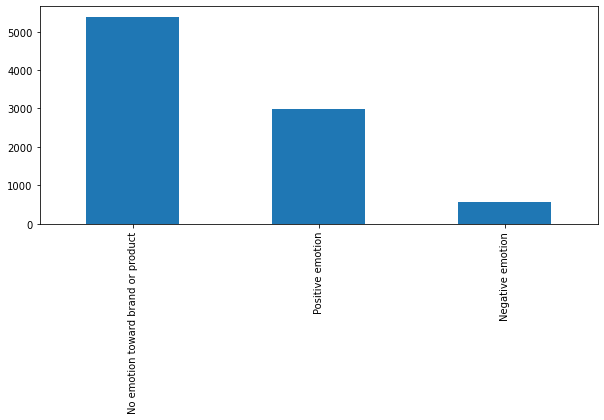

In [97]:
plt.figure(figsize=(10,4))
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar');

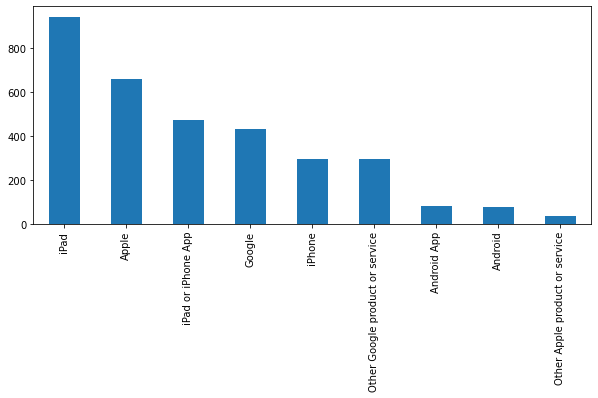

In [98]:
plt.figure(figsize=(10,4))
df['emotion_in_tweet_is_directed_at'].value_counts().plot(kind='bar');

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts= cv.fit_transform(df['tweet_text'].values.astype('U'))
type(text_counts)


scipy.sparse.csr.csr_matrix

In [100]:
df_text_counts = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())
df_text_counts

,0,00,000,00am,00pm,01am,02,03,0310apple,06,...,zms,zomb,zombie,zombies,zomg,zone,zoom,zuckerberg,zynga,zzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words = stop_list,tokenizer = token.tokenize)
text_tf= tf.fit_transform(df['tweet_text'].values.astype('U'))
text_tf.data

array([0.3623104 , 0.34174499, 0.30029339, ..., 0.67689124, 0.61121706,
       0.41016089])

In [102]:
def fn_tdm_df(docs, xColNames = None, **kwargs):
    ''' create a term document matrix as pandas DataFrame
    with **kwargs you can pass arguments of CountVectorizer
    if xColNames is given the dataframe gets columns Names'''

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs,stop_words = stop_list,tokenizer = token.tokenize)
    x1 = vectorizer.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = vectorizer.get_feature_names())

    if xColNames is not None:
        df.columns = xColNames

    return df

In [103]:
fn_tdm_df(df['tweet_text'].values.astype('U')).T

,0,00,000,00am,00pm,01am,02,03,0310apple,06,...,zms,zomb,zombie,zombies,zomg,zone,zoom,zuckerberg,zynga,zzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# train test split the lemmatized words
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer(ngram_range=(1,3), stop_words=stop_list)

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<7149x66922 sparse matrix of type '<class 'numpy.float64'>'
	with 149512 stored elements in Compressed Sparse Row format>

In [105]:
# get a quick look of the non zero elements

non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 20.913694222968246
Percentage of columns containing ZERO: 0.9996874914942325


In [106]:
df_freq_positive = df[df['is_there_an_emotion_directed_at_a_brand_or_product']=='Positive emotion']
df_freq_negative = df[df['is_there_an_emotion_directed_at_a_brand_or_product']=='Negative emotion']
df_freq_neutral = df[df['is_there_an_emotion_directed_at_a_brand_or_product']=='No emotion toward brand or product']


In [107]:
data_positive = df_freq_positive['tweet_text']
data_negative = df_freq_negative['tweet_text']
data_neutral = df_freq_neutral['tweet_text']

In [108]:
pros_positive = list(map(process_article, data_positive))
pros_negative = list(map(process_article, data_negative))
pros_neutral = list(map(process_article, data_neutral))

In [109]:
total_vocab_positive = set()
for comment in pros_positive:
    total_vocab_positive.update(comment)
len(total_vocab_positive)

4997

In [110]:
total_vocab_negative = set()
for comment in pros_negative:
    total_vocab_negative.update(comment)
len(total_vocab_negative)

2028

In [111]:
flat_positive = [item for sublist in pros_positive for item in sublist]
flat_negative = [item for sublist in pros_negative for item in sublist]
flat_neutral = [item for sublist in pros_neutral for item in sublist]

In [112]:
positive_freq = FreqDist(flat_positive)
negative_freq = FreqDist(flat_negative)
neutral_freq = FreqDist(flat_neutral)

In [113]:
# Top 20 Positive words:

positive_freq.most_common(20)

[('new', 360),
 ('pop', 214),
 ('amp', 211),
 ('ipad2', 211),
 ('android', 208),
 ('launch', 160),
 ('get', 158),
 ('one', 148),
 ('great', 137),
 ('party', 134),
 ('via', 132),
 ('line', 132),
 ('time', 128),
 ('free', 126),
 ('social', 124),
 ('circles', 122),
 ('cool', 120),
 ('like', 115),
 ('today', 114),
 ('day', 110)]

In [114]:
# Top 20 Negative words:

negative_freq.most_common(20)


[('new', 43),
 ('like', 39),
 ('circles', 34),
 ('social', 31),
 ('apps', 30),
 ('design', 29),
 ('people', 29),
 ('need', 25),
 ('android', 24),
 ('get', 24),
 ('one', 23),
 ('amp', 22),
 ('launch', 22),
 ('today', 21),
 ('would', 19),
 ('line', 18),
 ('news', 18),
 ('time', 18),
 ('think', 18),
 ('fail', 18)]

In [115]:
neutral_freq.most_common(20)

[('new', 679),
 ('amp', 601),
 ('social', 503),
 ('circles', 502),
 ('launch', 465),
 ('today', 441),
 ('android', 359),
 ('network', 356),
 ('pop', 355),
 ('via', 282),
 ('called', 277),
 ('free', 262),
 ('line', 253),
 ('mobile', 239),
 ('ipad2', 236),
 ('sxswi', 231),
 ('major', 230),
 ('get', 211),
 ('party', 210),
 ('possibly', 191)]

In [116]:
positive_total_word_count = sum(positive_freq.values())
positive_top_25 = positive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in positive_top_25:
    normalized_frequency = word[1]/positive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

new 		 0.0147
pop 		 0.008738
amp 		 0.008615
ipad2 		 0.008615
android 		 0.008493
launch 		 0.006533
get 		 0.006451
one 		 0.006043
great 		 0.005594
party 		 0.005471
via 		 0.00539
line 		 0.00539
time 		 0.005226
free 		 0.005145
social 		 0.005063
circles 		 0.004981
cool 		 0.0049
like 		 0.004695
today 		 0.004655
day 		 0.004491
maps 		 0.004328
w 		 0.004246
mobile 		 0.004165
sxswi 		 0.00396
awesome 		 0.003879


In [117]:

negative_total_word_count = sum(negative_freq.values())
negative_top_25 = negative_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in negative_top_25:
    normalized_frequency = word[1]/negative_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

new 		 0.008669
like 		 0.007863
circles 		 0.006855
social 		 0.00625
apps 		 0.006048
design 		 0.005847
people 		 0.005847
need 		 0.00504
android 		 0.004839
get 		 0.004839
one 		 0.004637
amp 		 0.004435
launch 		 0.004435
today 		 0.004234
would 		 0.003831
line 		 0.003629
news 		 0.003629
time 		 0.003629
think 		 0.003629
fail 		 0.003629
headaches 		 0.003427
1 		 0.003427
go 		 0.003427
pop 		 0.003427
day 		 0.003427


In [118]:
# create counts of Positive and Negative with values and words
positive_bar_counts = [x[1] for x in positive_freq.most_common(25)]
positive_bar_words = [x[0] for x in positive_freq.most_common(25)]

negative_bar_counts = [x[1] for x in negative_freq.most_common(25)]
negative_bar_words = [x[0] for x in negative_freq.most_common(25)]

In [119]:

# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

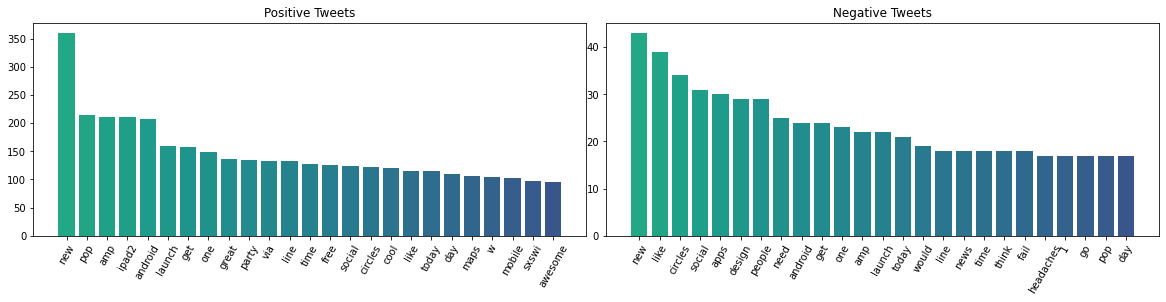

In [120]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(positive_bar_words, positive_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(negative_bar_words, negative_bar_counts, color=color )

ax.title.set_text('Positive Tweets')
ax2.title.set_text('Negative Tweets')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

In [121]:
# Getting our data into a dictionary
#FORMAT:  dictionary = dict(zip(keys, values))
!pip install wordcloud
from wordcloud import WordCloud
positive_dictionary = dict(zip(positive_bar_words, positive_bar_counts))
negative_dictionary = dict(zip(negative_bar_words, negative_bar_counts))

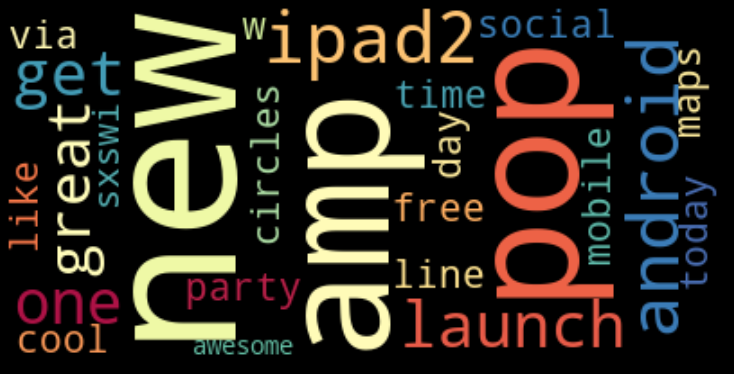

In [122]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(positive_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

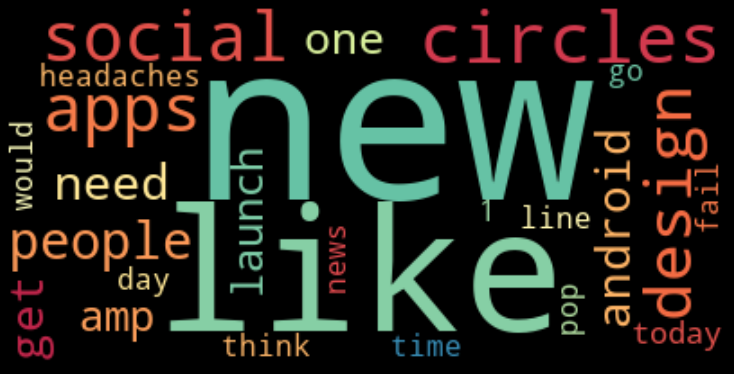

In [123]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(negative_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


## Build Dataframes

In [124]:
apple_df = pd.DataFrame(apple_text_counts.todense(), columns = cv_apple.get_feature_names())
google_df = pd.DataFrame(google_text_counts.todense(),columns = cv_google.get_feature_names())

In [125]:
#Test to Remove SXSW and Mention Stuff
apple_df=apple_df.drop(['sxsw', 'mention'], axis=1)
google_df=google_df.drop(['sxsw', 'mention'], axis=1)

## Google Train Test

In [126]:
# Establish features and target in data

gX=google_df
gy=google['is_there_an_emotion_directed_at_a_brand_or_product']

# Split features and target into training and testing partitions

gX_train, gX_test, gy_train, gy_test = train_test_split(gX, gy, random_state=1)

# Scale feature set according to standard distribution to make results more interpretable
scaler = StandardScaler()
scaler.fit(gX_train)
gX_train = scaler.transform(gX_train)  
gX_test = scaler.transform(gX_test)

## Google Decision Tree


In [127]:
# Establish decision tree model

gdtc = DecisionTreeClassifier(criterion= 'gini', class_weight='balanced', random_state=1)

# Fit decision tree model to training data

gdtc.fit(gX_train, gy_train)

# Make predictions on test set with model

gdtc_preds  = gdtc.predict(gX_test)

print(accuracy_score(gy_test, gdtc_preds))
print(f1_score(gy_test, gdtc_preds, pos_label='positive', average='weighted'))

NameError: name 'DecisionTreeClassifier' is not defined

## Apple Train Test

In [ ]:
# Establish features and target in data

aX=apple_df
ay=apple['is_there_an_emotion_directed_at_a_brand_or_product']

# Split features and target into training and testing partitions

aX_train, aX_test, ay_train, ay_test = train_test_split(aX, ay, random_state=1)

# Scale feature set according to standard distribution to make results more interpretable
ascaler = StandardScaler()
ascaler.fit(aX_train)
aX_train = ascaler.transform(aX_train)  
aX_test = ascaler.transform(aX_test)

## Apple Decision Tree

In [ ]:
# Establish decision tree model

adtc = DecisionTreeClassifier(criterion= 'gini', class_weight='balanced', random_state=1)

# Fit decision tree model to training data

adtc.fit(aX_train, ay_train)

# Make predictions on test set with model

adtc_preds  = adtc.predict(aX_test)

print(accuracy_score(ay_test, adtc_preds))
print(f1_score(ay_test, adtc_preds, pos_label='positive', average='weighted'))

## Apple Frequencies

In [ ]:
afreqpos=apple[apple['is_there_an_emotion_directed_at_a_brand_or_product']==1]
afreqneg=apple[apple['is_there_an_emotion_directed_at_a_brand_or_product']==0]
afreqneut=apple[apple['is_there_an_emotion_directed_at_a_brand_or_product']==2]

adatapos=afreqpos.tweet_text
adataneg=afreqneg.tweet_text
adataneut=afreqneut.tweet_text

apos = list(map(process_article, adatapos))
aneg = list(map(process_article, adataneg))
aneut = list(map(process_article, adataneut))

atotal_vocab_pos = set()
for comment in apos:
    atotal_vocab_pos.update(comment)

atotal_vocab_neg = set()
for comment in aneg:
    atotal_vocab_neg.update(comment)

atotal_vocab_neut = set()
for comment in aneut:
    atotal_vocab_neut.update(comment)
    
flat_apos = [item for sublist in apos for item in sublist]
flat_aneg = [item for sublist in aneg for item in sublist]
flat_aneut = [item for sublist in aneut for item in sublist]

apos_freq = FreqDist(flat_apos)
aneg_freq = FreqDist(flat_aneg)
aneut_freq = FreqDist(flat_aneut)

In [ ]:
apos_freq.most_common(20)

apos_total_word_count = sum(apos_freq.values())
apos_top_25 = apos_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in apos_top_25:
    normalized_frequency = word[1]/apos_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

In [ ]:
aneg_freq.most_common(20)

aneg_total_word_count = sum(aneg_freq.values())
aneg_top_25 = aneg_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in aneg_top_25:
    normalized_frequency = word[1]/aneg_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

In [ ]:
aneut_freq.most_common(20)

aneut_total_word_count = sum(aneut_freq.values())
aneut_top_25 = aneut_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in aneut_top_25:
    normalized_frequency = word[1]/aneut_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

## Google Frequencies

In [ ]:
gfreqpos=google[google['is_there_an_emotion_directed_at_a_brand_or_product']==1]
gfreqneg=google[google['is_there_an_emotion_directed_at_a_brand_or_product']==0]
gfreqneut=google[google['is_there_an_emotion_directed_at_a_brand_or_product']==2]

gdatapos=gfreqpos.tweet_text
gdataneg=gfreqneg.tweet_text
gdataneut=gfreqneut.tweet_text

gpos = list(map(process_article, gdatapos))
gneg = list(map(process_article, gdataneg))
gneut = list(map(process_article, gdataneut))

gtotal_vocab_pos = set()
for comment in gpos:
    gtotal_vocab_pos.update(comment)

gtotal_vocab_neg = set()
for comment in gneg:
    gtotal_vocab_neg.update(comment)

gtotal_vocab_neut = set()
for comment in gneut:
    gtotal_vocab_neut.update(comment)
    
flat_gpos = [item for sublist in gpos for item in sublist]
flat_gneg = [item for sublist in gneg for item in sublist]
flat_gneut = [item for sublist in gneut for item in sublist]

gpos_freq = FreqDist(flat_gpos)
gneg_freq = FreqDist(flat_gneg)
gneut_freq = FreqDist(flat_gneut)

In [ ]:

gpos_freq.most_common(20)

gpos_total_word_count = sum(gpos_freq.values())
gpos_top_25 = gpos_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in gpos_top_25:
    normalized_frequency = word[1]/gpos_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

In [ ]:
gneg_freq.most_common(20)

gneg_total_word_count = sum(gneg_freq.values())
gneg_top_25 = gneg_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in gneg_top_25:
    normalized_frequency = word[1]/gneg_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

In [ ]:

gneut_freq.most_common(20)

gneut_total_word_count = sum(gneut_freq.values())
gneut_top_25 = gneut_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in gneut_top_25:
    normalized_frequency = word[1]/gneut_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

In [ ]:
plt.figure(figsize=(10,4))
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar');

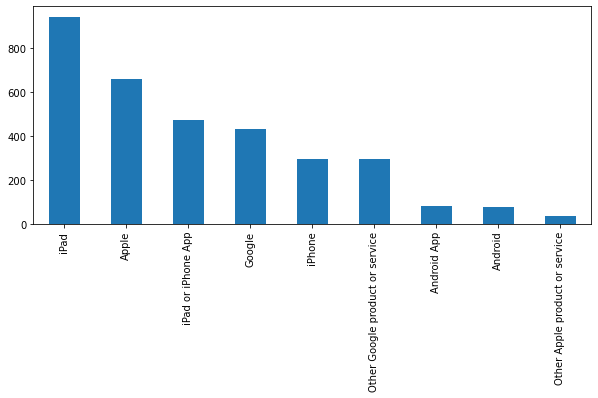

In [128]:
plt.figure(figsize=(10,4))
df['emotion_in_tweet_is_directed_at'].value_counts().plot(kind='bar');

In [129]:
# wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies()
# plt.figure(figsize=(10,10), facecolor='k')
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

#### Most Frequent Words by Category?

#### Word Count by Category? Do people that like brand talk longer about it?

## Train Test Split

In [130]:
X_lem = lemmatized_output
y_lem = target

In [131]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.40, random_state=1)

In [132]:
sentiments = ['Negative emotion','Positive Emotion','No emotion toward brand or product']

In [133]:
nb_pipeline = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())])
nb_pipeline.fit(X_train_lem, y_train_lem)


from sklearn.metrics import classification_report
y_pred = nb_pipeline.predict(X_test_lem)

print('accuracy %s' % accuracy_score(y_pred, y_test_lem))
print(classification_report(y_test_lem, y_pred,target_names=sentiments))

accuracy 0.6517482517482518
                                    precision    recall  f1-score   support

                  Negative emotion       1.00      0.02      0.04       228
                  Positive Emotion       0.65      0.94      0.77      2164
No emotion toward brand or product       0.66      0.24      0.36      1183

                          accuracy                           0.65      3575
                         macro avg       0.77      0.40      0.39      3575
                      weighted avg       0.68      0.65      0.59      3575



In [134]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [135]:
nb_pipeline2 = Pipeline([('vect', MeanEmbeddingVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())])
nb_pipeline.fit(X_train_lem, y_train_lem)


from sklearn.metrics import classification_report
y_pred = nb_pipeline.predict(X_test_lem)

print('accuracy %s' % accuracy_score(y_pred, y_test_lem))
print(classification_report(y_test_lem, y_pred,target_names=sentiments))

TypeError: __init__() missing 1 required positional argument: 'word2vec'

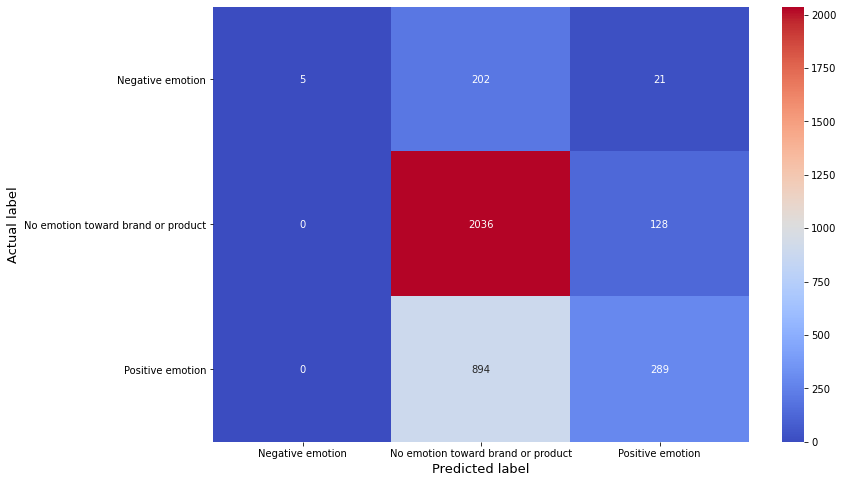

In [136]:
#Generate confusion matrix
labels = np.unique(y_test_lem)
cm = confusion_matrix(y_test_lem, y_pred,labels=labels) 

cm_df = pd.DataFrame(cm,index=labels, columns=labels)

#Plot
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df,
            cmap='coolwarm', 
            annot=True, 
            fmt='g')

plt.ylabel('Actual label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

In [137]:
y_hats2 = nb_pipeline.predict(lemmatized_output)

df['y_hats'] = y_hats2

In [138]:
df.loc[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == "Positive emotion") & (df['y_hats'] == 'No emotion toward brand or product')]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,y_hats
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,No emotion toward brand or product
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,No emotion toward brand or product
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,No emotion toward brand or product
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,No emotion toward brand or product
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,No emotion toward brand or product
...,...,...,...,...
9064,@mention you should see the line here at #SXSW...,Apple,Positive emotion,No emotion toward brand or product
9070,You know you've made it to #sxsw when you see ...,iPad,Positive emotion,No emotion toward brand or product
9071,what are your essentials for #SxSW? Mine? poc...,iPad,Positive emotion,No emotion toward brand or product
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion,No emotion toward brand or product


In [140]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train_lem, y_train_lem)

y_pred = logreg.predict(X_test_lem)

print('accuracy %s' % accuracy_score(y_pred, y_test_lem))
print(classification_report(y_test_lem, y_pred,target_names=sentiments))

accuracy 0.6346853146853146
                                    precision    recall  f1-score   support

                  Negative emotion       0.44      0.32      0.37       228
                  Positive Emotion       0.71      0.74      0.72      2164
No emotion toward brand or product       0.52      0.51      0.52      1183

                          accuracy                           0.63      3575
                         macro avg       0.56      0.52      0.54      3575
                      weighted avg       0.63      0.63      0.63      3575



C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
sv = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=1, max_iter=5, tol=None)),])
sv.fit(X_train_lem, y_train_lem)
y_pred = sv.predict(X_test_lem)

print('accuracy %s' % accuracy_score(y_pred, y_test_lem))
print(classification_report(y_test_lem, y_pred,target_names=sentiments))

accuracy 0.6372027972027972
                                    precision    recall  f1-score   support

                  Negative emotion       1.00      0.01      0.03       228
                  Positive Emotion       0.63      0.98      0.77      2164
No emotion toward brand or product       0.78      0.12      0.21      1183

                          accuracy                           0.64      3575
                         macro avg       0.80      0.37      0.34      3575
                      weighted avg       0.70      0.64      0.54      3575



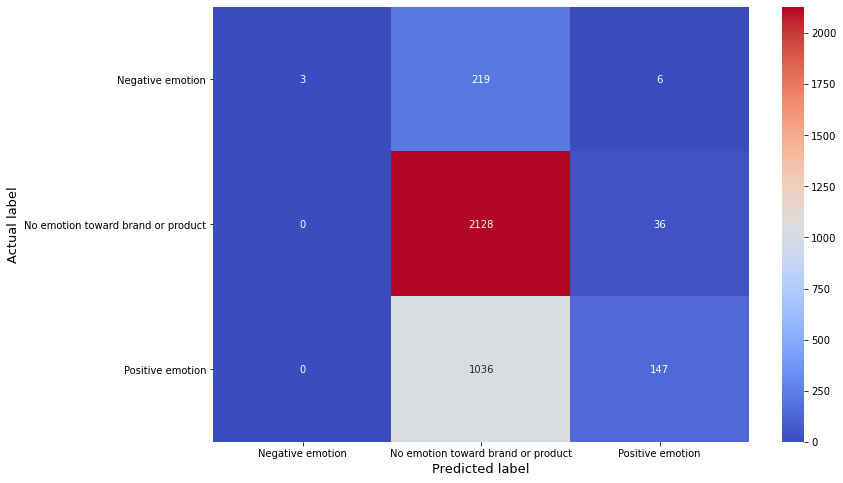

In [64]:
#Generate confusion matrix
labels = np.unique(y_test_lem)
cm = confusion_matrix(y_test_lem, y_pred,labels=labels) 

cm_df = pd.DataFrame(cm,index=labels, columns=labels)

#Plot
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df,
            cmap='coolwarm', 
            annot=True, 
            fmt='g')

plt.ylabel('Actual label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

In [67]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train_lem, y_train_lem)
y_pred = logreg.predict(X_test_lem)

print('accuracy %s' % accuracy_score(y_pred, y_test_lem))
print(classification_report(y_test_lem, y_pred,target_names=sentiments))

accuracy 0.6355244755244756
                                    precision    recall  f1-score   support

                  Negative emotion       0.43      0.32      0.37       228
                  Positive Emotion       0.71      0.73      0.72      2164
No emotion toward brand or product       0.53      0.52      0.52      1183

                          accuracy                           0.64      3575
                         macro avg       0.55      0.52      0.54      3575
                      weighted avg       0.63      0.64      0.63      3575



C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('svc', LinearSVC()),
               ])
logreg.fit(X_train_lem, y_train_lem)
y_pred = logreg.predict(X_test_lem)

print('accuracy %s' % accuracy_score(y_pred, y_test_lem))
print(classification_report(y_test_lem, y_pred,target_names=sentiments))

accuracy 0.6693706293706294
                                    precision    recall  f1-score   support

                  Negative emotion       0.51      0.27      0.35       228
                  Positive Emotion       0.71      0.81      0.76      2164
No emotion toward brand or product       0.58      0.50      0.54      1183

                          accuracy                           0.67      3575
                         macro avg       0.60      0.52      0.55      3575
                      weighted avg       0.66      0.67      0.66      3575



In [66]:
# positive_list = []
# negative_list = []
# for i in range(len(lemmatized_output)):
#     if lemmatized_output[i][1] == "Positive emotion":
#         positive_list.extend(lemmatized_output[i][0])
#     else:
#         negative_list.extend(lemmatized_output[i][0])

In [ ]:
# tweet_types = ('Negative emotion','Positive Emotion','No emotion toward brand or product')
# encoding = OneHotEncoder(handle_unknown='ignore')
# encoding_df = pd.DataFrame(enc.fit_transform(df[['is_there_an_emotion_directed_at_a_brand_or_product']]).toarray())

In [ ]:
# df = df.join(encoding_df)
# df

In [ ]:
# df.rename(columns={0:'Unknown',1:'Negative',2:'No Emotion',3:'Positive'}, inplace=True)

In [ ]:
lemmatized_output

In [ ]:
tokenized_sents = [word_tokenize(i) for i in lemmatized_output]

In [ ]:
model = Word2Vec(tokenized_sents, size=100, window=5, min_count=1, workers=4)

In [ ]:
model.train(lemmatized_output, total_examples=model.corpus_count, epochs=10)

In [ ]:
word2vec = model.wv

In [ ]:
wordlist = list(model.wv.vocab)

In [ ]:
wordlist

In [ ]:
word_test = "awesome"
model.wv.most_similar(positive=word_test)


In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [ ]:
etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])

In [142]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train_lem, y_train_lem)
y_pred = model.predict(X_test_lem)


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


ValueError: could not convert string to float: 'join actsofsharing com amp starting tonight person friend city end win'